For this project I chose titanic data to analyze. Following are the questions that will be analyzed in this report.

Q1. What is the distribution of the age of the passengers?

Q2. What are the number of male and female passengers?

Q3. What are the number of passengers in each class?

Q4. What are the age distributions of passengers in different classes?

Q5. What are the number of male and female passengers in each class?

Q6. What is the fare charged for each class and does it depend on the port of embarkation?

Q7. How many passengers survived in each class?

Q8. What are the chances of survival for a passenger in each class?

Q9. How many male vs. female passenger survived?

Q10. What is the chance of survival for a female passenger?

Q11. What are the chances of survival for passengers of different age group?

**Data wrangling**

For some of the analysis, some of the values were missing or were NaN. Such rows of data were avoided by using dropna() functions. These rows were only avoided for those analysis. For other analysis where that missing value was not relevant such rows of data were included.

To estimate the chance of survival in different age groups a new column of data was added to the dataframe. This new column was 'Age group'. This new column was populated using the apply function on 'Age' column. This new column indicates the age group of the passenger.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

titanic_data = pd.read_csv('titanic-data.csv')

Q1. What is the distribution of the age of the passengers?

Ans:The first subplot below shows the distribution of the age of the passengers. Plot suggests that a big proportion of the passengers were young adults in age group of 20-40.


Q2. What are the number of male and female passengers?

Ans: The second subplot shows that on Titanic there were 577 male and 314 female passengers.

Q3. What are the number of passengers in each class?

Ans: From the third plot we can clearly see that most of the passengeres were in Class3 and almost equivalent number of passengers in Class 1 and 2.


Number of male and female passengers
male      577
female    314
Name: Sex, dtype: int64
-------------------------
Number of passengers in each class
3    491
1    216
2    184
Name: Pclass, dtype: int64


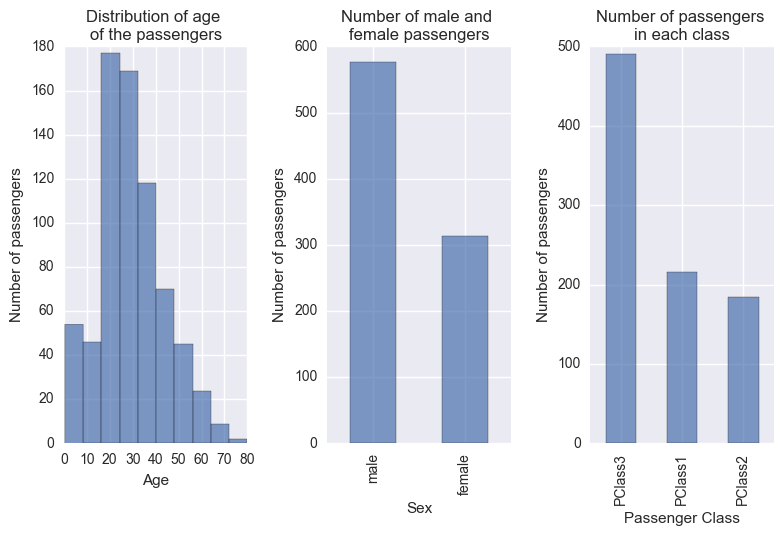

In [2]:
#analysis of age, Sex and number of passengers in each class
plt.figure(1)
plt.subplot(1,3,1)
titanic_data['Age'].hist(alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Distribution of age \nof the passengers')
plt.subplot(1,3,2)
titanic_data['Sex'].value_counts().plot(kind='bar',ax=plt.gca(),alpha = 0.7)
print 'Number of male and female passengers'
print titanic_data['Sex'].value_counts()
plt.xlabel('Sex')
plt.ylabel('Number of passengers')
plt.title('Number of male and \nfemale passengers')
plt.subplot(1,3,3)
titanic_data['Pclass'].value_counts().plot(kind='bar',ax=plt.gca(),alpha = 0.7)
print '-------------------------\nNumber of passengers in each class'
print titanic_data['Pclass'].value_counts()
plt.xlabel('Passenger Class')
plt.xticks([0,1,2],['PClass3','PClass1','PClass2'])
plt.ylabel('Number of passengers')
plt.title('Number of passengers \nin each class')
plt.tight_layout()

Q4. What are the age distributions of passengers in different classes?

Ans: The plot below indicates the age distribution of passengers in different classes. All classes have roughly the same distribution with most of its passenger in age group of 20-40.

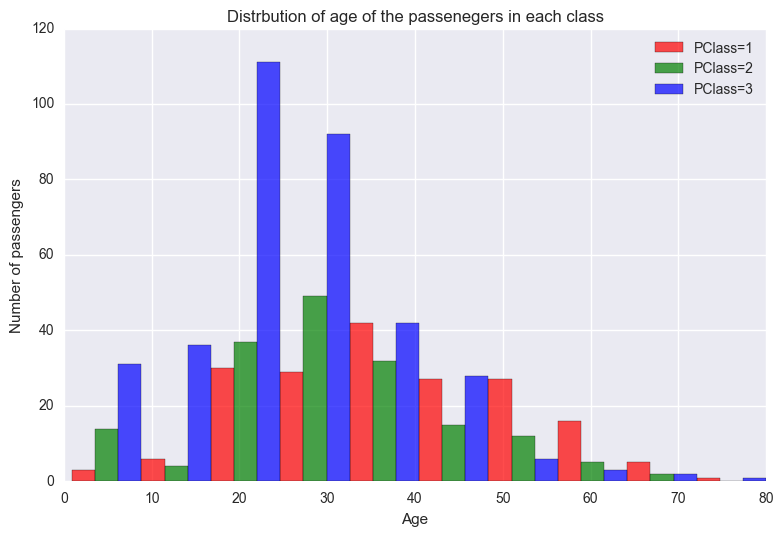

In [3]:
# analysis of age grouped by class
#print titanic_data_grouped_by_class.describe()

fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(titanic_data[titanic_data['Pclass']==1]['Age'].dropna())
b_heights, b_bins = np.histogram(titanic_data[titanic_data['Pclass']==2]['Age'].dropna(), bins=a_bins)
c_heights, c_bins = np.histogram(titanic_data[titanic_data['Pclass']==3]['Age'].dropna(), bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red',alpha = 0.7,label='PClass=1')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='green',alpha = 0.7,label='PClass=2')
ax.bar(c_bins[:-1]+2*width, c_heights, width=width, facecolor='blue',alpha = 0.7,label='PClass=3')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.title('Distrbution of age of the passenegers in each class')
plt.tight_layout()

Q5. What are the number of male and female passengers in each class?

Ans. This plot shows the number of male and female passengers in each class. This plot indicates that in Class 2 and 1 had almost equivalent number of male and female passengers, however in Class 3 most of the passengers were male passengers.

male      122
female     94
Name: Sex, dtype: int64


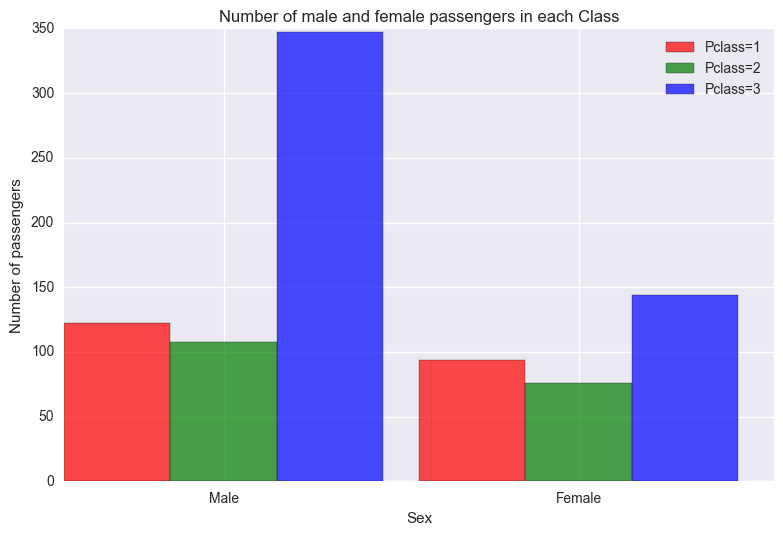

In [4]:
# analysis of Sex grouped by class

print titanic_data[titanic_data['Pclass']==1]['Sex'].value_counts()
fig, ax = plt.subplots()
bar_width = 0.3
plt.bar(np.array([1,2]), titanic_data[titanic_data['Pclass']==1]['Sex'].value_counts(),bar_width,label='Pclass=1',color='r',alpha = 0.7)
plt.bar(np.array([1,2])+bar_width, titanic_data[titanic_data['Pclass']==2]['Sex'].value_counts(),bar_width,label='Pclass=2',color='g',alpha = 0.7)
plt.bar(np.array([1,2])+2*bar_width, titanic_data[titanic_data['Pclass']==3]['Sex'].value_counts(),bar_width,label='Pclass=3',color='b',alpha = 0.7)
#titanic_data[titanic_data['Pclass']==3]['Sex'].value_counts().plot(kind='bar')

plt.xlabel('Sex')
plt.ylabel('Number of passengers')
plt.title('Number of male and female passengers in each Class')
plt.xticks(np.array([1,2]) + 0.45, ('Male', 'Female'))
plt.legend()
plt.tight_layout()

Q6. What is the fare charged for each class and does it depend on the port of embarkation?

Ans. This box plot show fare charged to the passengers of Titanic. The box plot shows the distribution of fare in each class. From the plot we can clearly see that the mean fare (shown by red line in each plot) for Class 1 is the highest and lowest for Class 3. It seems that fares for Class 2 were slightly higher than Class 3. A further analysis such as t-test or Anova would be required to see if the differences in the fare are statistically significant.

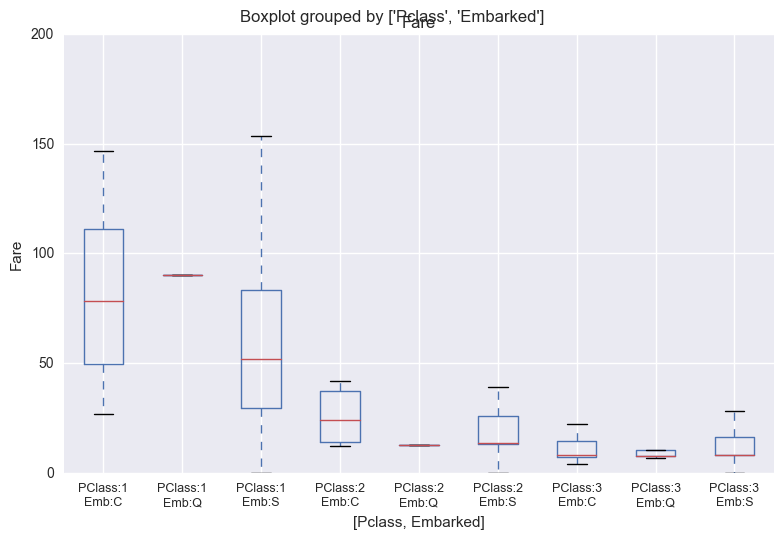

In [5]:
#Mean fare grouped by class and Embarked
#titanic_data_grouped_by_class_Embarked = titanic_data.groupby(['Pclass','Embarked'])['Fare'].describe()
#print titanic_data_grouped_by_class_Embarked

fig, ax = plt.subplots()
titanic_data.boxplot('Fare',['Pclass','Embarked'],ax=ax,fontsize=9)
ax.set_ylim([0, 200])
plt.ylabel('Fare')
plt.xticks(np.arange(9)+1, ('PClass:1\nEmb:C','PClass:1\nEmb:Q','PClass:1\nEmb:S','PClass:2\nEmb:C','PClass:2\nEmb:Q',
                            'PClass:2\nEmb:S','PClass:3\nEmb:C','PClass:3\nEmb:Q','PClass:3\nEmb:S'))
plt.tight_layout()

Out of 891 passengers available data only 342 passengers survived and 549 passengers died.

In [6]:
titanic_data_groupedby_Survived = titanic_data.groupby('Survived').count()
print titanic_data_groupedby_Survived['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64


**Survival analysis**

Q7. How many passengers survived in each class?

Ans.The first subplot below shows the number of passengers in each class survived or died. The plot indicates that most passengers died were from class 3.

Q8. What are the chances of survival for a passenger in each class?

Ans. The second subplot below shows the chance of survival in each class. This plot shows that if a passenger is from Class 1 then that passenger had a good chance of survival with a probaility of around 0.6, whereas the chance of survival is only about 0.25 for a passenger from Class 3. 


Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64


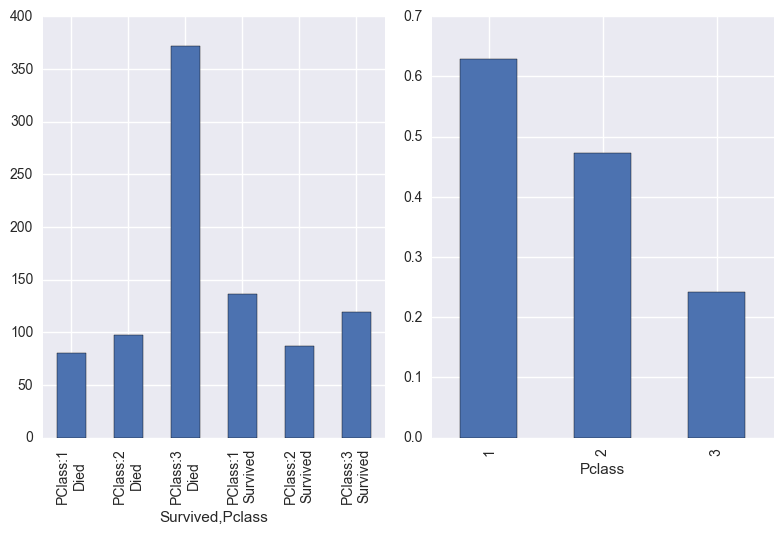

In [7]:
titanic_data_groupedby_Survived = titanic_data.groupby(['Survived','Pclass']).count()
print titanic_data_groupedby_Survived['PassengerId']
plt.figure(1)
plt.subplot(1,2,1)
titanic_data_groupedby_Survived['PassengerId'].plot(kind='bar')
plt.xticks(np.arange(6), ('PClass:1\nDied','PClass:2\nDied','PClass:3\nDied','PClass:1\nSurvived','PClass:2\nSurvived',
                            'PClass:3\nSurvived'))
# chances of survival if you are in first class
plt.subplot(1,2,2)
titanic_data.groupby(['Pclass'])['Survived'].mean().plot(kind='bar')
plt.tight_layout()

Q9. How many male vs. female passenger survived?

Ans. The first subplot below shows the number of dead and survived male and female passengers. From the plot we can see that most of dead passengers were male.

Q10. What is the chance of survival for a female passenger?

Ans. The second subplot below shows that female passengers had really good chance of survival with survival probability of about 0.75, whereas for male passengers chances of survival were very low around 0.2.


Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


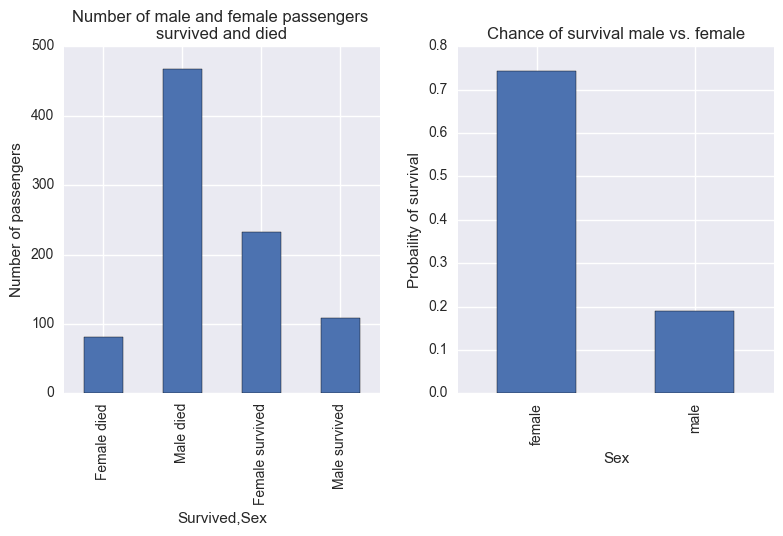

In [8]:
titanic_data_groupedby_Survived_Sex = titanic_data.groupby(['Survived','Sex']).count()
print titanic_data_groupedby_Survived_Sex['PassengerId']
plt.figure(1)
plt.subplot(1,2,1)
titanic_data_groupedby_Survived_Sex['PassengerId'].plot(kind='bar')
plt.ylabel('Number of passengers')
plt.title('Number of male and female passengers \nsurvived and died')
plt.xticks(np.arange(4), ('Female died','Male died','Female survived','Male survived'))
# chances of survival if you are Female
plt.subplot(1,2,2)
titanic_data.groupby(['Sex'])['Survived'].mean().plot(kind='bar')
plt.ylabel('Probaility of survival')
plt.title('Chance of survival male vs. female')
plt.tight_layout()

Q11. What are the chances of survival for passengers of different age group?

Ans. For this analysis I created a new column with Age group of passenger. Each age group had range of 10 years. From the plot below we can say that the chance of survival were best for the children in age group of 0-10 and old passengers in age group of 80-90. The plot below also shows zero survival chance for passengers in 70-80 age group, this could be because of zero or very few passengers in this group. 

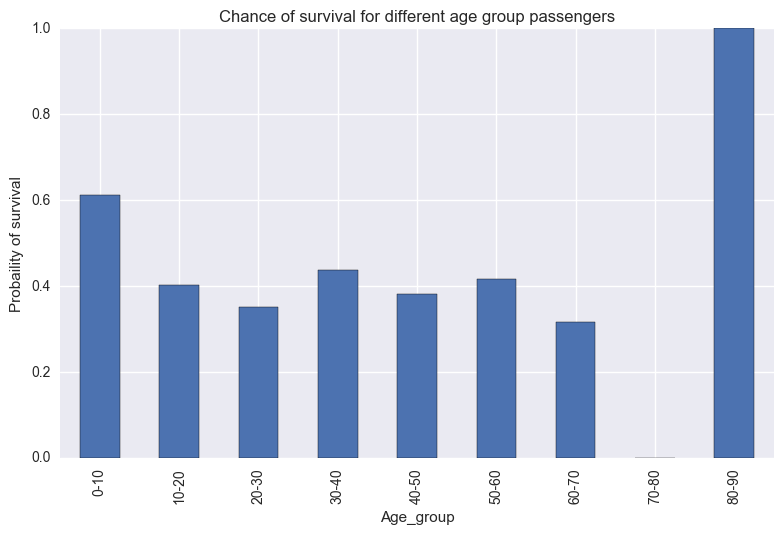

In [9]:
def covertToAgeRange(age):
    if age<10:
        return '0-10'
    elif age<20:
        return '10-20'
    elif age<30:
        return '20-30'
    elif age<40:
        return '30-40'
    elif age<50:
        return '40-50'
    elif age<60:
        return '50-60'
    elif age<70:
        return '60-70'
    elif age<80:
        return '70-80'
    elif age<90:
        return '80-90'
    elif age<100:
        return '90-100'
    else:
        return np.nan

titanic_data['Age_group']  = titanic_data['Age'].apply(covertToAgeRange)  

titanic_data.groupby(['Age_group'])['Survived'].mean().plot(kind='bar')
plt.ylabel('Probaility of survival')
plt.title('Chance of survival for different age group passengers')
plt.tight_layout()

**Conclusion and limitations**

The data indicates that the passengers onboard Titanic were mostly young male. Most of the passengers were in Class 3 which had the cheapest fare. Statistical analysis would be required such as t-test to demonstrate the statistically significant differences in the fares. Class 1 and Class 2 passengers had almost equal proportion of male and female passengers indicating that most of the passengers were affluent and were travelling as couple. To be sure we need further analysis of family structure of the passengers. I speculate that Class 3 passengers were mostly young males because they were travelling to America to find new work. Further analysis and data would be required to make definite conclusions, for example passengers employment data, salary, purpose of travel etc. 

Survival analysis of data indicates that females, children, old passengers and passengers from Class 1 had good survival chance. However we cannot be very certain about this conclusion because data of only 891 passegers was provided for the analysis. The total number of passegers onboard Titanic was 1317. The survival analysis would have been much more accurate if data of all 1317 passengers was provided. 

I speculate that chance of survival for females, children, old passengers and passengers from Class 1 was better than others because they were allowed to get on the life boats first before any passenger from Class 3. From this data it is still not clear why so many passanger died. Further analysis and data would be required to understand why so many passengers did not survive, for example number of life boats, were there enough life boats available on Titanic to save all passengers. Other factors that could contribute towards the death of so many passengers, like weather information, proximity of other ships in the ocean, etc.